<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

6.0.1


## Data preparation

In [2]:
df = pd.read_csv('data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
plotly_df(df.set_index('date')[['count']])

In [6]:
from prophet import Prophet

In [7]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426
- 5229
- 2744

In [8]:
df_train = df[:-predictions].copy()
m = Prophet()
m.fit(df_train)


17:45:18 - cmdstanpy - INFO - Chain [1] start processing
17:45:18 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [10]:
future.shape

(383, 1)

Estimate the quality of the prediction with the last 30 points.

In [11]:
predict = m.predict(future)
predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2977.168399,1708.877099,2508.755710,2956.789760,2996.085595,-861.727923,-861.727923,-861.727923,-861.727923,-861.727923,-861.727923,0.0,0.0,0.0,2115.440476
379,2016-01-17,2982.524268,1881.016194,2637.097526,2960.898988,3002.479671,-720.760235,-720.760235,-720.760235,-720.760235,-720.760235,-720.760235,0.0,0.0,0.0,2261.764034
380,2016-01-18,2987.880138,2890.286174,3664.941127,2964.573465,3009.154294,281.393573,281.393573,281.393573,281.393573,281.393573,281.393573,0.0,0.0,0.0,3269.273711
381,2016-01-19,2993.236008,3128.066554,3954.720736,2968.363619,3015.986307,541.459498,541.459498,541.459498,541.459498,541.459498,541.459498,0.0,0.0,0.0,3534.695506
382,2016-01-20,2998.591877,3033.023546,3834.537707,2972.203735,3022.642280,425.524867,425.524867,425.524867,425.524867,425.524867,425.524867,0.0,0.0,0.0,3424.116744


Answer: 3424

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5 <- ANSWER
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600 <- ANSWER
- 903

In [12]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.

       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
        historical.set_index("ds")
    )
cmp_df = make_comparison_dataframe(df, predict)
cmp_df.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-16,2115.440476,1708.877099,2508.755710,1644
2016-01-17,2261.764034,1881.016194,2637.097526,1836
2016-01-18,3269.273711,2890.286174,3664.941127,2983
2016-01-19,3534.695506,3128.066554,3954.720736,3389
2016-01-20,3424.116744,3033.023546,3834.537707,3559


In [13]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.

       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [14]:
calculate_forecast_errors(cmp_df,predictions)

{'MAPE': np.float64(34.434921704478135), 'MAE': np.float64(598.3901307027409)}

## Predicting with ARIMA

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

In [16]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = sm.tsa.adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
adf_test(df['y'])


Results of Dickey-Fuller Test:
Test Statistic                  -3.288864
p-value                          0.015384
#Lags Used                      15.000000
Number of Observations Used    367.000000
Critical Value (1%)             -3.448294
Critical Value (5%)             -2.869448
Critical Value (10%)            -2.570983
dtype: float64


In [ ]:
dftest = sm.tsa.SARIMAX(df['y'], autolag="AIC")

dftest.summary()

/Users/bahacelik/Library/Caches/pypoetry/virtualenvs/mlcourse-J5ZHcbuN-py3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/bahacelik/Library/Caches/pypoetry/virtualenvs/mlcourse-J5ZHcbuN-py3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



AttributeError: 'SARIMAX' object has no attribute 'summary'

null hypothesis of adf: time series has a unit root (not-stationary)
alternative hypothesis: time series doesnt have a unit root (stationary)

Since our p-value(0.0154) < alpha (chosen as 0.05 here) we reject the null hypothesis meaning that our time series is stationary

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1 (ANSWER)
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

In [17]:
df.set_index('ds', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383 entries, 2015-01-01 to 2016-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       383 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


In [19]:
df = df.dropna()

In [20]:
df = df.asfreq('D')

In [21]:
type(df.index)
df.index.freq

<Day>

In [22]:
df = df[~df.y.isna()]

Dickey-Fuller test: p=0.015384


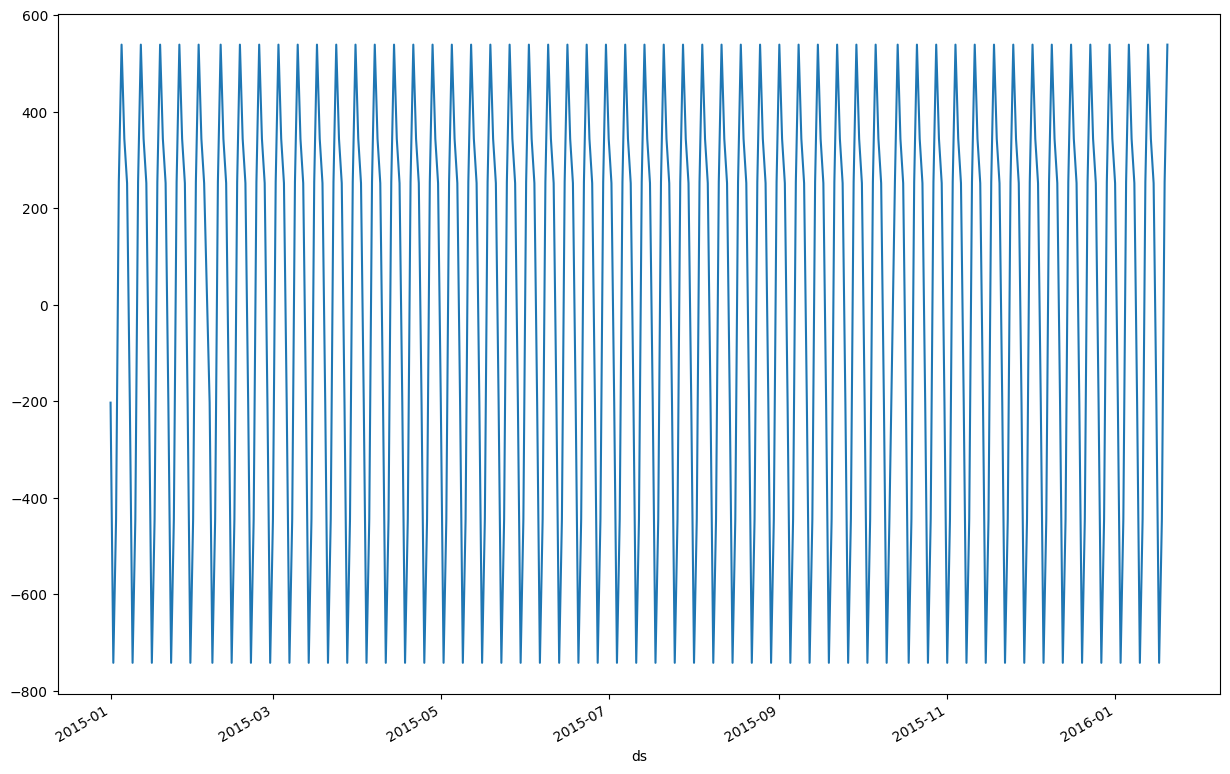

In [23]:
#first understand if our data has seasonality
res = sm.tsa.seasonal_decompose(df['y'], period=7)
res.seasonal.plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(df['y'])[1])

In [24]:
df_train.set_index('ds', inplace=True)

Dickey-Fuller test: p=0.000000


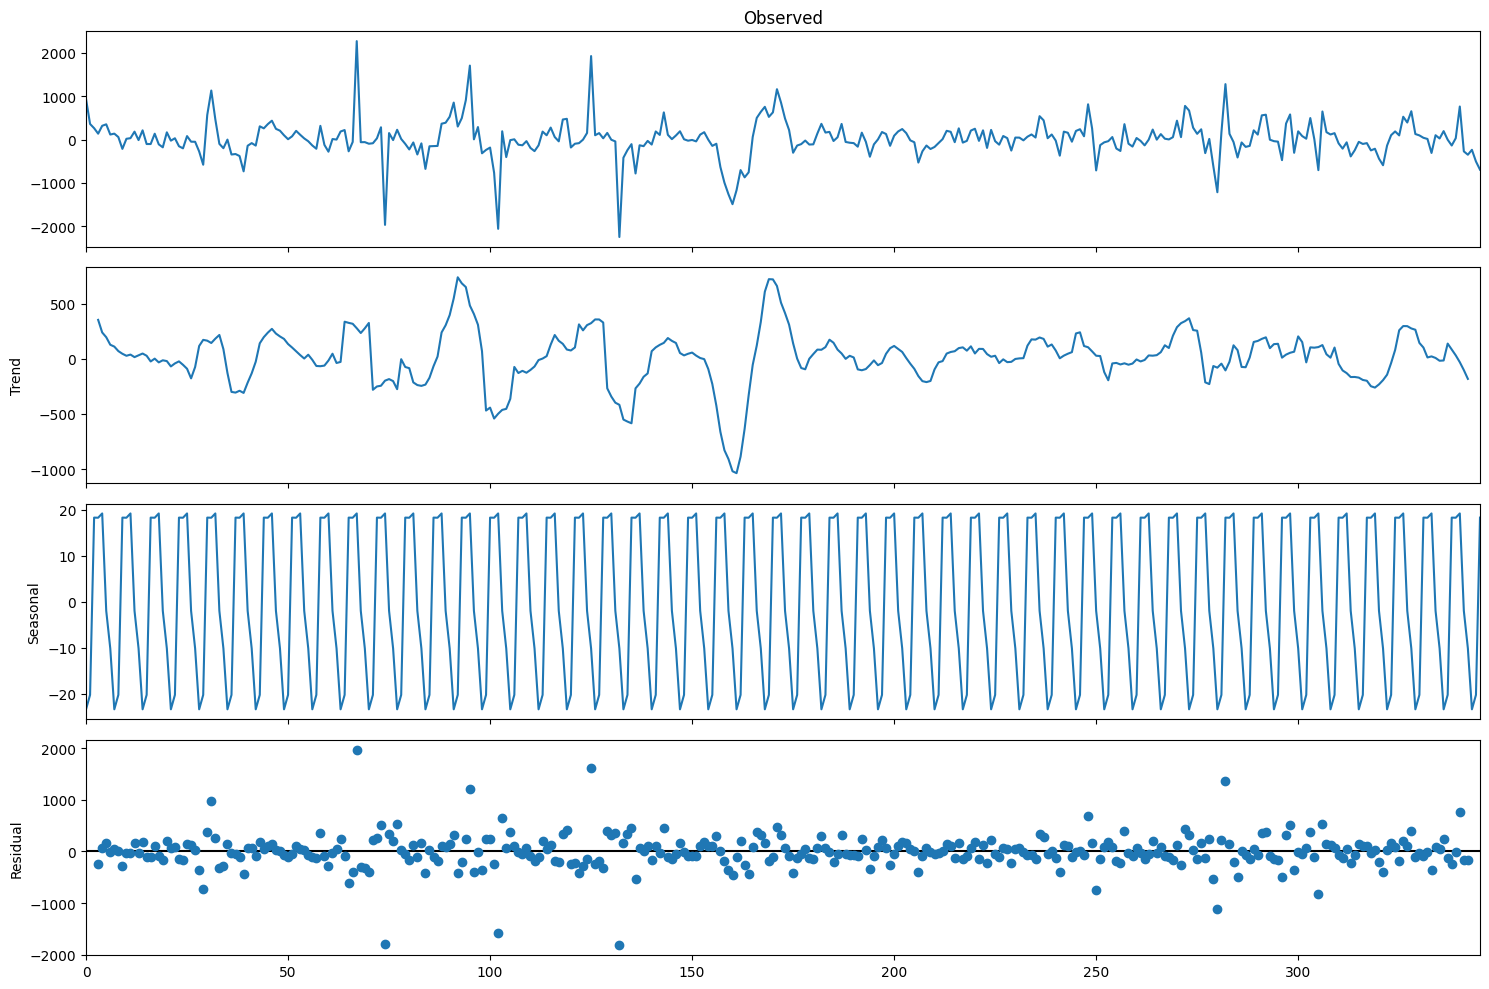

In [25]:
df_train['y_diff'] = df_train.y - df_train.y.shift(7)
sm.tsa.seasonal_decompose(df_train.y_diff[7:].values, period=7).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.y_diff[8:])[1])

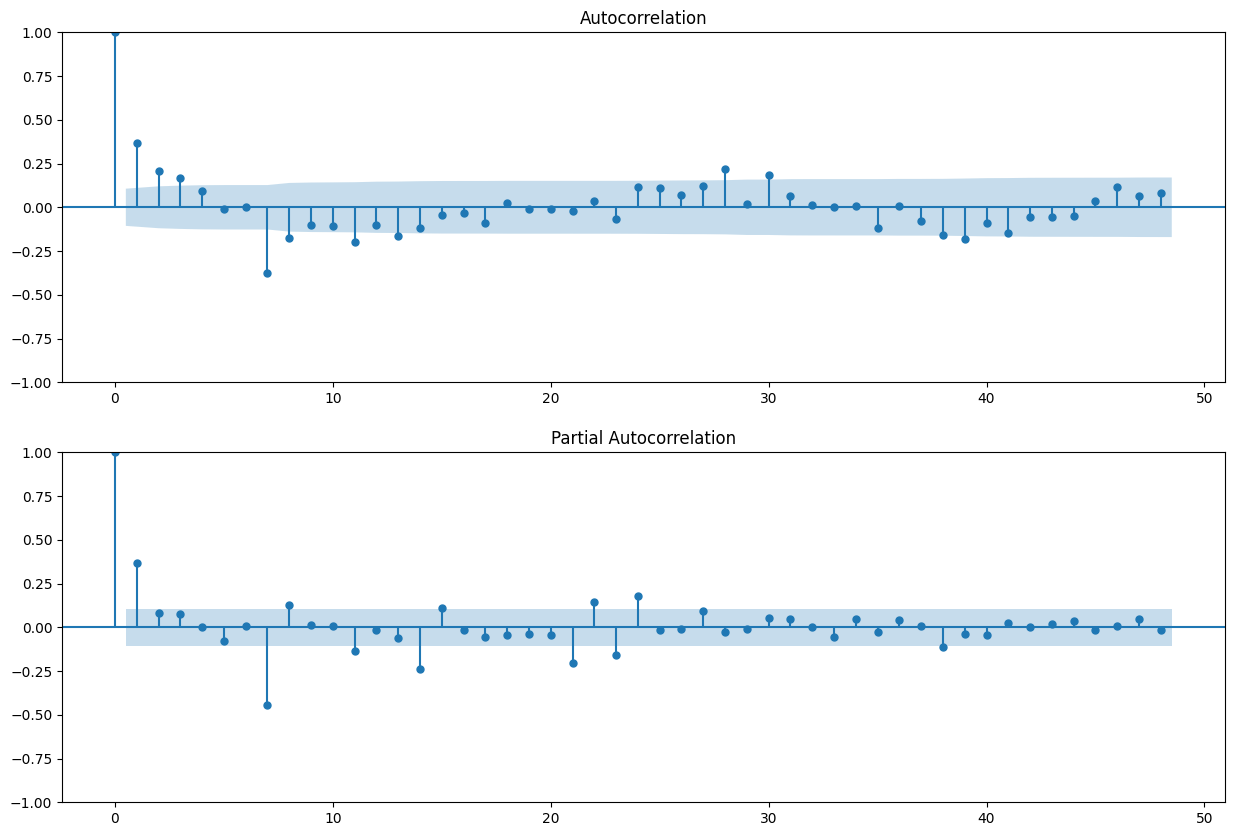

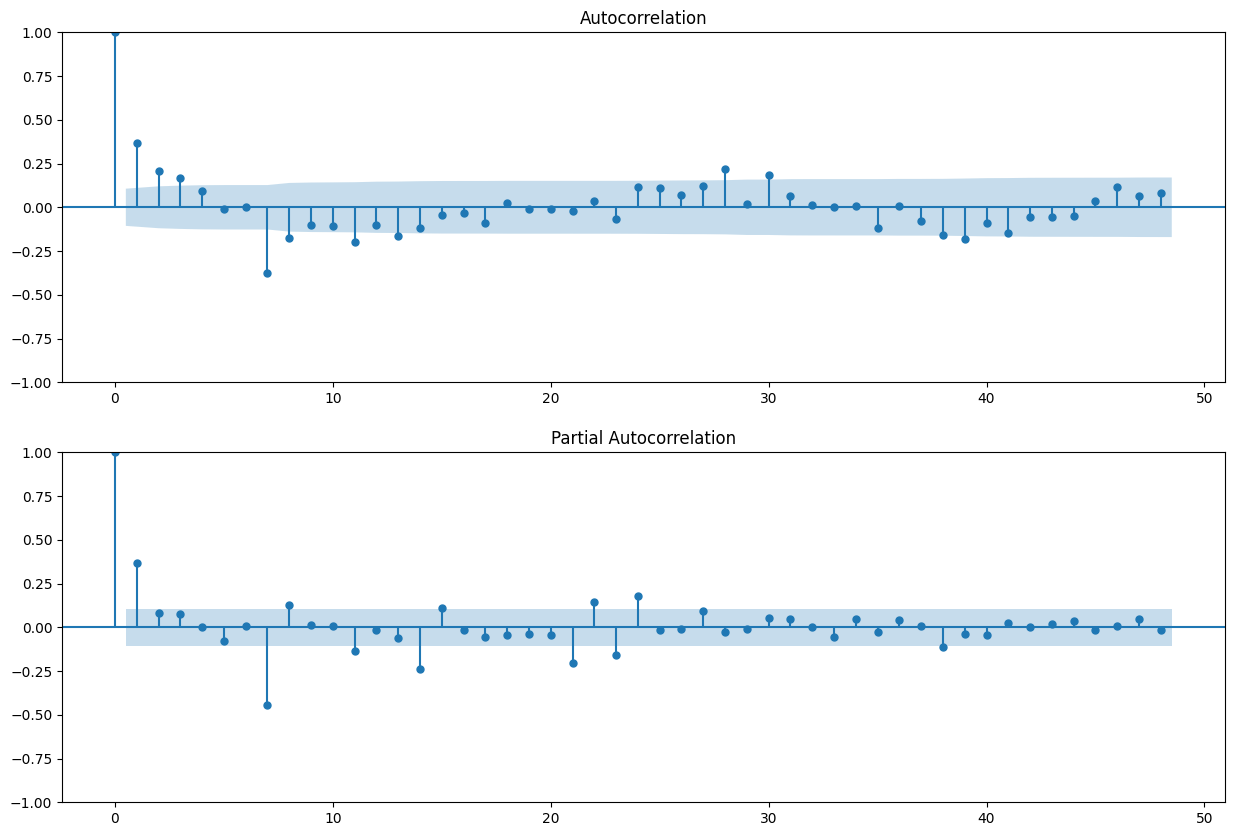

In [26]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_train.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_train.y_diff[13:].values.squeeze(), lags=48, ax=ax)

In [31]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [32]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [34]:
%%time
import warnings
from tqdm import tqdm
results1 = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(df_train['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

100%|██████████| 384/384 [03:13<00:00,  1.98it/s]

CPU times: user 3min 9s, sys: 3.07 s, total: 3min 12s
Wall time: 3min 13s


In [35]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ['parameters', 'aic']
print(result_table1.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
66   (0, 0, 2, 3, 0, 1)    14.000000
328  (1, 1, 1, 3, 0, 1)    14.000000
89   (0, 0, 3, 3, 0, 0)    14.000000
165  (0, 1, 2, 3, 2, 1)  4961.632632
332  (1, 1, 1, 3, 2, 1)  4962.841640


In [36]:
result_table1[result_table1['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])]

,parameters,aic
255,"(1, 0, 2, 3, 0, 0)",5174.678617
257,"(1, 0, 2, 3, 1, 0)",5022.312524
354,"(1, 1, 2, 3, 1, 1)",5019.555903
356,"(1, 1, 2, 3, 2, 1)",4989.004019


In [37]:
import scipy.stats
df_train['y_box'], lmbda = scipy.stats.boxcox(df_train['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [39]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model=sm.tsa.statespace.SARIMAX(df_train['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
    #print parameters on which the model is not trained and proceed to the next set
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')

  0%|          | 0/384 [00:00<?, ?it/s]

100%|██████████| 384/384 [02:36<00:00,  2.45it/s]


In [41]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ['parameters', 'aic']
print(result_table2.sort_values(by = 'aic', ascending=True).head())

             parameters          aic
205  (1, 0, 0, 2, 0, 1)    10.000000
233  (1, 0, 1, 2, 2, 1)    12.000000
43   (0, 0, 1, 3, 0, 1)    12.000000
358  (1, 1, 2, 3, 2, 0)    14.000000
263  (1, 0, 2, 3, 2, 1)  3528.651459


In [42]:
result_table2[result_table2['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])].sort_values(by='aic')

,parameters,aic
359,"(1, 1, 2, 3, 2, 1)",3534.540843
260,"(1, 0, 2, 3, 1, 0)",3556.880696
357,"(1, 1, 2, 3, 1, 1)",3557.854111
258,"(1, 0, 2, 3, 0, 0)",3674.916567


In [43]:
result_table2[result_table2['parameters'].isin([(1, 0, 2, 3, 1, 0),
                                                (1, 1, 2, 3, 2, 1),
                                                (1, 1, 2, 3, 1, 1),
                                                (1, 0, 2, 3, 0, 0)])].sort_values(by='aic')

,parameters,aic
359,"(1, 1, 2, 3, 2, 1)",3534.540843
260,"(1, 0, 2, 3, 1, 0)",3556.880696
357,"(1, 1, 2, 3, 1, 1)",3557.854111
258,"(1, 0, 2, 3, 0, 0)",3674.916567


In [44]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                   0.000
Date:                             Thu, 08 May 2025   AIC                             10.000
Time:                                     18:15:04   BIC                             29.332
Sample:                                          0   HQIC                            17.693
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.001    880.067      0.000       0.997       1.001
ar.S.L7     4.086e-07   3.0

/Users/bahacelik/Library/Caches/pypoetry/virtualenvs/mlcourse-J5ZHcbuN-py3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning:

divide by zero encountered in divide

/Users/bahacelik/Library/Caches/pypoetry/virtualenvs/mlcourse-J5ZHcbuN-py3.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1431: RuntimeWarning:

invalid value encountered in divide

/Users/bahacelik/Library/Caches/pypoetry/virtualenvs/mlcourse-J5ZHcbuN-py3.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning:

invalid value encountered in divide



Student's test: p=0.000000
Dickey-Fuller test: p=0.119300


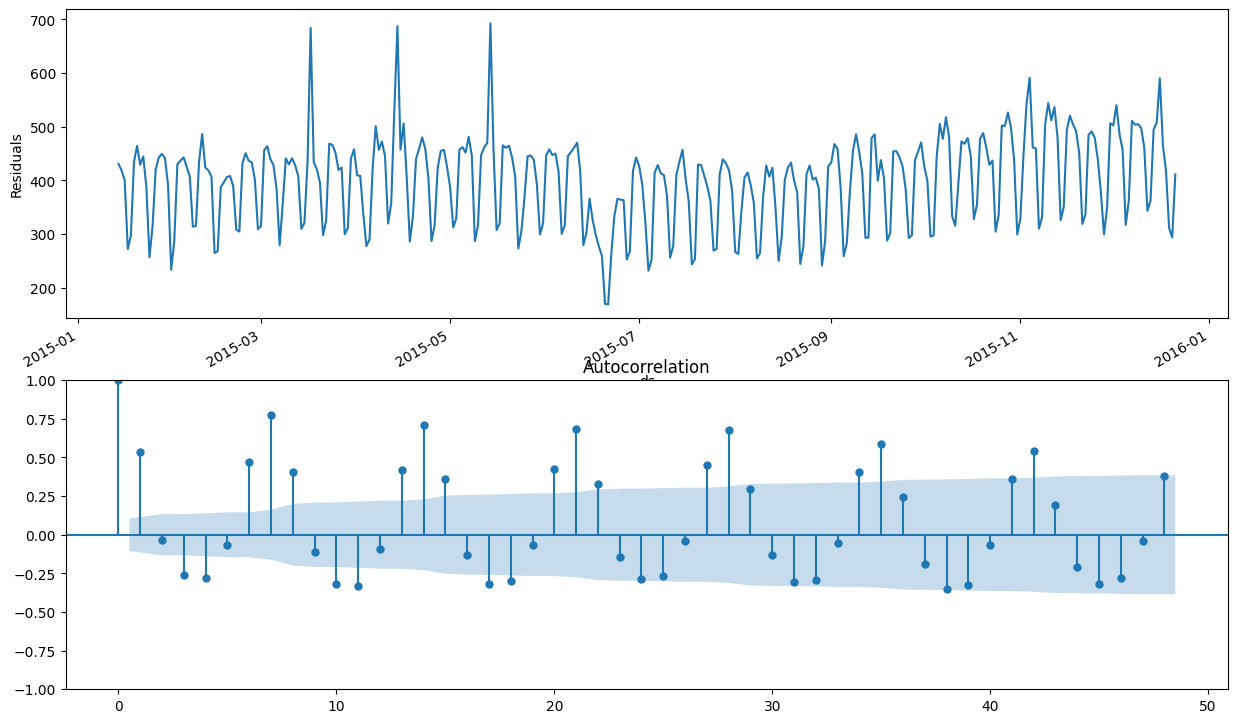

In [45]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [46]:
def invboxcox(y,lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

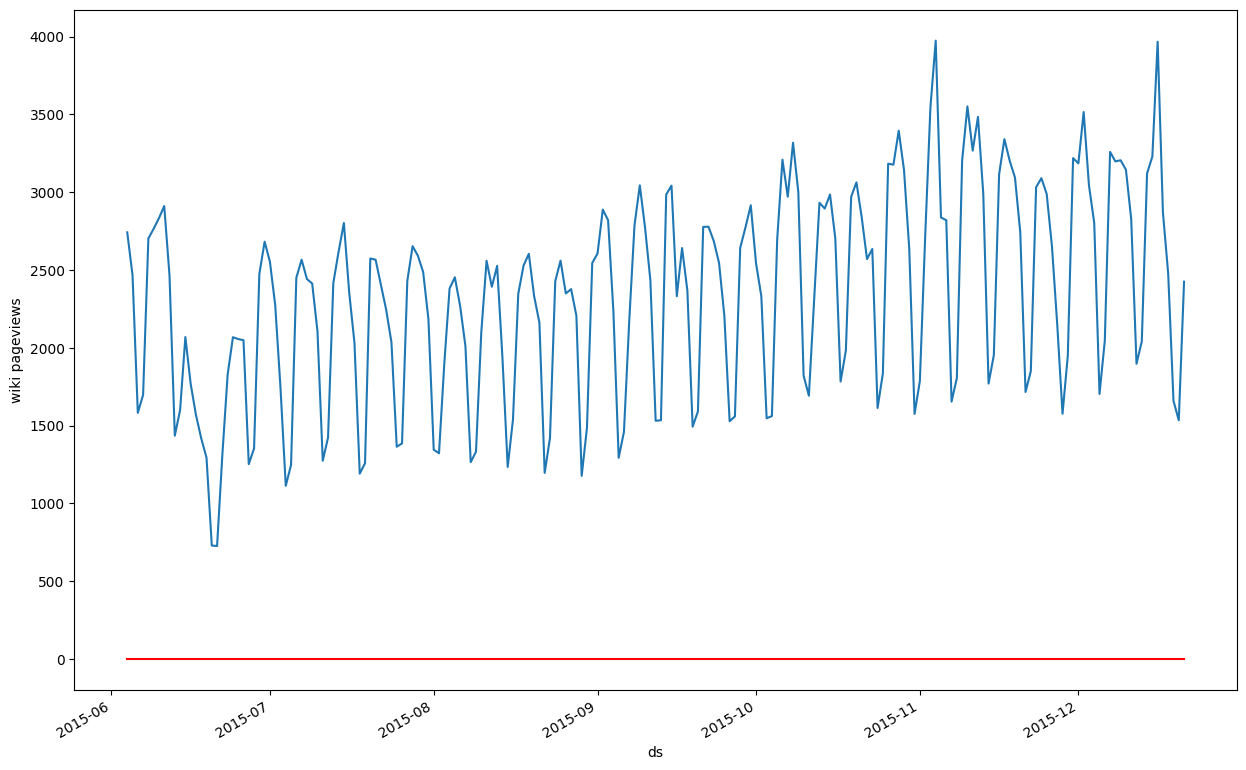

In [47]:
df_train['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

df_train.y.tail(200).plot()
df_train.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('wiki pageviews');